In [1]:
# MO444-A 2s/2017 - Third assignment
#
#         Group 05
#
# - Anderson Rossanez (124136)
# - Bruno Branta Lopes (31470)
#

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import scale

def loadIDs():
    lines=[]
    with open('documents/ids', "r") as f:
        lines = f.read().splitlines()
    return np.asarray(lines)

def loadFeatures():
    features = pd.read_csv('documents/data.csv', sep=',', header=None)
    return features.values

def loadDocument(docID):
    data = None
    with open('documents/docs/' + docID, 'r') as docfile:
        data = docfile.read().replace('\n', '')
    return data

def computeKMeansMetrics(model, data):
    labels = model.fit_predict(data)
    cost = model.inertia_
    sil_avg = silhouette_score(data, labels)
    return labels, cost, sil_avg

In [2]:
ids = loadIDs()
print('IDs shape: {}'.format(ids.shape))

data = loadFeatures()
print('Data shape: {}'.format(data.shape))

IDs shape: (19924,)
Data shape: (19924, 2209)


In [3]:
# Let's look at the 5 first instances of the IDs
print(ids[0:5])

['832e15531654188fa0b951faa5f68540dfb1ca5a'
 'aa5163928a6edfd3bf69fd11fe763aacecf4602d'
 'e886703afff0c70d6598bcae0c2d69a5a237807f'
 'c1ea507b177b2e1673ce7a576057f91b75ae9d29'
 'bbf73405c85d22702fafc1c0916e8f713810ff8d']


In [4]:
# Now, let's have a look at the 5 first instances of the data (bag-of-words feature vectors)
data_frame = pd.DataFrame(data)
data_frame.head(5)

,0,1,2,3,4,5,6,7,8,9,...,2199,2200,2201,2202,2203,2204,2205,2206,2207,2208
0,0.077257,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.055755,0.0,0.0
2,0.042250,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.093693,0.0,0.099296,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.069105,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.036811,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.041917,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [5]:
# Checking the value ranges
print('Min. value: {}'.format(np.min(data.flatten())))
print('Max. value: {}'.format(np.max(data.flatten())))

# Let's scale and normalize the data
data = scale(data)

normalizer = Normalizer()
normalizer = normalizer.fit(data)

data = normalizer.transform(data)

Min. value: 0.0
Max. value: 0.999901


In [9]:
# Attempting Mini-Batch K means with some different number of centroids.
kmeans, labels, costs, sil_avgs = [], [], [], []
num_centroids = xrange(2, 250, 10)
for i in num_centroids:
    model = MiniBatchKMeans(n_clusters=i, init='k-means++', batch_size=1000, random_state=1)
    myLabels, cost, sil_avg = computeKMeansMetrics(model, data)
    kmeans.append(model)
    labels.append(myLabels)
    costs.append(cost)
    sil_avgs.append(sil_avg)
    print('%d clusters: Cost %5.2f ; Silhouette avg %5.5f' % (i, cost, sil_avg))

2 clusters: Cost 19800.31 ; Silhouette avg 0.00620
12 clusters: Cost 19357.20 ; Silhouette avg 0.00866
22 clusters: Cost 19055.20 ; Silhouette avg 0.01307
32 clusters: Cost 18853.50 ; Silhouette avg 0.01554
42 clusters: Cost 18665.24 ; Silhouette avg 0.01695
52 clusters: Cost 18529.23 ; Silhouette avg 0.01812
62 clusters: Cost 18404.48 ; Silhouette avg 0.01989
72 clusters: Cost 18255.37 ; Silhouette avg 0.02059
82 clusters: Cost 18154.10 ; Silhouette avg 0.02185
92 clusters: Cost 18070.38 ; Silhouette avg 0.02203
102 clusters: Cost 17951.09 ; Silhouette avg 0.02288
112 clusters: Cost 17854.56 ; Silhouette avg 0.02105
122 clusters: Cost 17838.31 ; Silhouette avg 0.01839
132 clusters: Cost 17784.61 ; Silhouette avg 0.01832
142 clusters: Cost 17697.47 ; Silhouette avg 0.01802
152 clusters: Cost 17603.62 ; Silhouette avg 0.02345
162 clusters: Cost 17556.41 ; Silhouette avg 0.02012
172 clusters: Cost 17517.10 ; Silhouette avg 0.01656
182 clusters: Cost 17540.91 ; Silhouette avg 0.01084
192 

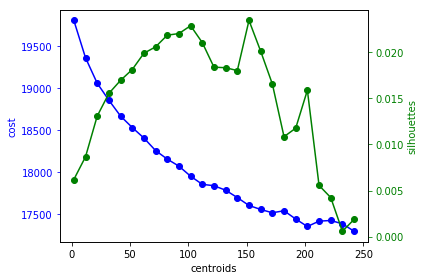

In [10]:
fig, ax1 = plt.subplots()

# Plot costs curve
ax1.set_xlabel('centroids')
ax1.errorbar(num_centroids, costs, 0, 
             fmt='-o', ecolor='b', capthick=1, capsize=3, color='b')
ax1.set_ylabel('cost', color='b')
ax1.tick_params('y', colors='b')

# Plot the silhouette averages
ax2 = ax1.twinx()
ax2.errorbar(num_centroids, sil_avgs, 0, 
             fmt='-o', ecolor='g', capthick=1, capsize=3, color='g')
ax2.set_ylabel('silhouettes', color='g')
ax2.tick_params('y', colors='g')

fig.tight_layout()
plt.show()

In [11]:
# Chosen number of centroids: 152
chosen_model = kmeans[15]
chosen_model_labels = labels[15]
print('Chosen # of centroids: {}'.format(chosen_model.n_clusters))

Chosen # of centroids: 152


In [12]:
# Let's check three sample groups, their medoid documents, and two other closer documents.
for i in [26, 32, 58]:
    print('Group: %d' % i)
    center = chosen_model.cluster_centers_[i]
    group_points = data[chosen_model_labels == i]
    group_doc_ids = ids[chosen_model_labels == i]

    # Let's find the medoid and their closest points
    distancesMatrix = pairwise_distances(group_points, metric='euclidean')
    closest_to_medoid_indexes = np.argsort(distancesMatrix.sum(axis=0))
    medoid_index = closest_to_medoid_indexes[0]

    print(' - Medoid doc: {}'.format(group_doc_ids[medoid_index]))
    print(loadDocument(group_doc_ids[medoid_index]))
    print(' - ')
    print(' -- Closest to medoid doc: {}'.format(group_doc_ids[closest_to_medoid_indexes[1]]))
    print(loadDocument(group_doc_ids[closest_to_medoid_indexes[1]]))
    print(' -- ')
    print(' --- Second closest to medoid doc: {}'.format(group_doc_ids[closest_to_medoid_indexes[2]]))
    print(loadDocument(group_doc_ids[closest_to_medoid_indexes[2]]))
    print(' --- ')

Group: 26
 - Medoid doc: 8671104cc2825c284d5142d11c9a2d553a9fc037
Newsgroups: comp.os.ms-windows.miscPath: cantaloupe.srv.cs.cmu.edu!rochester!udel!gatech!howland.reston.ans.net!zaphod.mps.ohio-state.edu!uwm.edu!linac!uchinews!kimbark!ajs8From: ajs8@kimbark.uchicago.edu (adam jeremy schorr)Subject: 32 bit AccessMessage-ID: <1993May14.181805.9052@midway.uchicago.edu>Sender: news@uchinews.uchicago.edu (News System)Reply-To: ajs8@midway.uchicago.eduOrganization: University of ChicagoDate: Fri, 14 May 1993 18:18:05 GMTLines: 5	I have a Gateway 4dx2/66v. Does anyone know if I csn (or can't)Duse 32 bit access?DD
 - 
 -- Closest to medoid doc: 58b97cfb5bfb45288d6d5bf34ea6c966c59b9e1c
Newsgroups: rec.sport.baseballPath: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!zaphod.mps.ohio-state.edu!uwm.edu!linac!uchinews!quads!as16From: as16@quads.uchicago.edu (adam  shah)Subject: Re: When Is Melido Due Back?Message-ID: <1993Apr16.184245.25632@midway.uchicago.edu>S